2. Para el conjunto de entrenamiento usado en la tarea del perceptron, repita la experiencia pero ahora con el Adaline. Evalue y compare este algoritmo con los resultados obtenidos en la y tarea anterior. Comente sobre su escogencia en los parametros de aprendizaje.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import csv
### Leer archivo .csv
def readCSV(file):
    with open(file, newline='') as File:
        reader = csv.reader(File)
        data = []
        for r in reader:
            for i in range(1, len(r)):
                r[i] = float(r[i])/255 #escalamos los datos
            data.append(r)
    return data

#tomamos los numeros separados por ',' armamos la lista de vectores,
#excluyendo el primer elemento que corresponde a la prediccion
def genTrainData(rawData):
  N = len(rawData)
  data = []
  for i in range(N):
    data.append(np.array(rawData[i][1:]))
  return data

#tomamos los numeros separados por ',' armamos la lista de vectores,
#tomando unicamente el primer elemento que corresponde a la prediccion
def genLabels(rawData):
  N = len(rawData)
  data = []
  for i in range(N):
    label = np.zeros(10)
    label[int(rawData[i][0])] = 1
    data.append(label)
  return data


#guardamos los datos de entrenamiento
raw_train_data = readCSV('/content/drive/My Drive/RNA/Tarea 3/mnist_train.csv')
train_data = genTrainData(raw_train_data)
train_labels = genLabels(raw_train_data)

#guardamos los datos de prueba
raw_test_data = readCSV('/content/drive/My Drive/RNA/Tarea 3/mnist_test.csv')
test_data = genTrainData(raw_test_data)
test_labels = genLabels(raw_test_data)

#Definimos el min y max del rango de pesos
weight_range_min = -0.5
weight_range_max = 0.5

#Definimos el numero de epocas
num_of_epochs = 50

#definimos la taza de aprendizaje
learning_rate = 0.001

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Para esta comparacion usaremos los parametros que produjeron el resultado mas estable para el perceptron en la tarea pasada, es decir 50 epocas y 0.001 como taza de aprendizaje

In [ ]:
import numpy as np
import random

#Perceptron multiclase, los datos de entrada y su respuesta esperada
#deben venir en forma de lista de arreglos de numpy.
#Representa una red de una capa con un numero de perceptrones clasicos
#iguales a la dimension de los datos de salida
class MulticlassPerceptron():

    #Inicializacion de la red, con los datos necesarios para definir la neurona
    def __init__(self, train_data, labels, function, weight_range_min, weight_range_max):
        dim_imputs       = train_data[0].shape[0] + 1
        dim_outputs      = labels[0].shape[0]
        #dimension de los datos de entrada +1 k esto para no manejar un vector adicional de pesos
        self.dim_imputs  = dim_imputs
        #dimension de las respuestas esperadas m
        self.dim_outputs = dim_outputs
        #matriz de tamaño m,k donde cada elemento pertenece al intervalo (weight_range_min,weight_range_max)
        self.weights     = np.random.uniform(low=weight_range_min, high=weight_range_max, size=(dim_outputs, dim_imputs))
        #funcion de activacion
        self.function    = function
        #lista de precisiones que registra la red al final de cada epoca
        self.acc_evol    = []

    #Recibe el vector de datos de entrada y devuelve el vector de respuesta predecida
    #Nota no se creo un vector de pesos adicional
    def predict(self, input):
        wx = np.dot(self.weights, np.append(input, 1))
        return [self.function(x) for x in wx]

    #Recibe la lista de vectores de datos de entrada, el numero de estos
    #la lista de vectores de respuestas, numero de veces que se presentan los datos
    #y taza de entrenamiento, actuliza los pesos de acuerdo a las predicciones
    def train(self, training_inputs, number_of_inputs, labels, numOfEpochs, learningRate):
        self.acc_evol = []
        data_index = list(range(number_of_inputs))
        for e in range(numOfEpochs):
            #reordenamos el orden de seleccion para que sea aleatoria
            random.shuffle(data_index)
            for index in data_index:
                #hacemos una prediccion
                prediction      =   self.predict(training_inputs[index])
                #actualizamos los pesos 
                self.weights    +=  learningRate * np.outer((labels[index] - prediction), np.append(training_inputs[index], 1))
            #evaluamos la precision de la red al final de esta epoca
            acc = self.accuracy(training_inputs, number_of_inputs, labels)
            #agregamos la precision al registro
            self.acc_evol.append(acc)
            #si se han predicho correctamente todos los resultados de los datos de entrenamiento
            #el perceptron ya ha convergido y no ha necesidad de seguir entrenando
            if acc == 1:
                break

    #Recibe la lista de vectores de datos de entrada, el numero de estos y
    #la lista de vectores de respuestas correspondientes, devuelve el numero de
    #veces que la red arroja el resultado esperado dividido entre el numero de datos predichos
    def accuracy(self, inputs, number_of_inputs, labels):
        acc = 0
        for i in range(number_of_inputs):
            if np.array_equal(self.predict(inputs[i]), labels[i]):
                acc += 1
        return acc/number_of_inputs

###############################################################################

#Funcion de activacion para el perceptron
def umbral(x):
    if x > 0:
        return 1
    else:
        return 0

#inicializamos la red
Perceptron0001 = MulticlassPerceptron(train_data, train_labels, umbral, weight_range_min, weight_range_max)

#entrenamos la red
Perceptron0001.train(train_data, len(train_data), train_labels, num_of_epochs, learning_rate)

0.7288


In [ ]:
################################################################################
import random
import numpy as np

#Implementacion de un Adaline usando el algoritmo del LMS
#el codigo es bastante similar al del perceptron multiclase
class Adaline():

    def __init__(self, train_data, labels, function, weight_range_min, weight_range_max):
        dim_imputs       = train_data[0].shape[0] + 1
        dim_outputs      = labels[0].shape[0]
        self.dim_imputs  = dim_imputs
        self.dim_outputs = dim_outputs
        self.weights     = np.random.uniform(low=weight_range_min, high=weight_range_max, size=(dim_outputs, dim_imputs))
        self.function    = function
        self.acc_evol = []

    def predict(self, input):
        wx = np.dot(self.weights, np.append(input, 1))
        return [self.function(x) for x in wx]

    def train(self, training_inputs, number_of_inputs, labels, numOfEpochs, learningRate):
        data_index = list(range(number_of_inputs))
        for e in range(numOfEpochs):
            random.shuffle(data_index)
            for index in data_index:
                prediction      =   self.predict(training_inputs[index])
                error = labels[index] - prediction
                self.weights    +=  learningRate * np.outer((error), np.append(training_inputs[index], 1))
            acc = self.accuracy(training_inputs, number_of_inputs, labels)
            self.acc_evol.append(acc)

    #Para la cuantificar la efectividad, consideramos
    #el mayor elemento del vector como un 1 y el resto
    #como 0 para poder hacer comparaciones con los
    #resultados deseados para el ejericio de los digitos
    def accuracy(self, inputs, number_of_inputs, labels):
        acc = 0
        for i in range(number_of_inputs):
            a = self.predict(inputs[i])
            indexMax = np.argmax(a)
            predict = np.zeros(10)
            predict[indexMax] = 1
            if np.array_equal(predict, labels[i]):
                acc += 1
        return acc/number_of_inputs

#Funcion de activacion para el adaline
def identity(x):
    return x

#inicializamos el Adaline
adaline0001 = Adaline(train_data, train_labels, identity, weight_range_min, weight_range_max)

#entrenamos la red
adaline0001.train(train_data, len(train_data), train_labels, num_of_epochs, learning_rate)

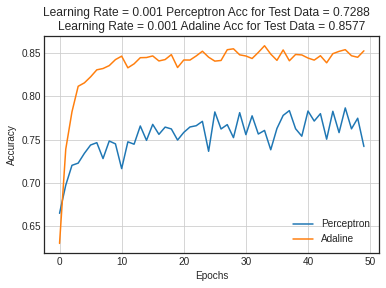

In [ ]:
################################################################################
import matplotlib.pyplot as plt

p1 = plt.plot(Perceptron0001.acc_evol)
p2 = plt.plot(adaline0001.acc_evol)
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.title('Learning Rate = %.3f Adaline Acc for Test Data = %.4f' % (learning_rate,adaline0001.accuracy(test_data, len(test_data), test_labels)))
plt.suptitle('Learning Rate = %.3f Perceptron Acc for Test Data = %.4f' % (learning_rate,Perceptron0001.accuracy(test_data, len(test_data), test_labels)))
plt.legend((p1[0], p2[0]), ('Perceptron', 'Adaline'))
plt.grid(True)
plt.show()

La grafica muestra claramente como el adaline deja atras al perceptron en esta comparacion en igualdad de condiciones, observando su porcentaje de clasificaciones exitosas durante el entrenamiento, pero tambien en su efectividad frente a los datos de prueba. Adicionalmente repetimos el experimento para las tazas de aprendizaje 0.1 y 0.01, para ver si este resultado se repite

/usr/local/lib/python3.6/dist-packages/numpy/core/numeric.py:906: RuntimeWarning: invalid value encountered in multiply
  return multiply(a.ravel()[:, newaxis], b.ravel()[newaxis, :], out)


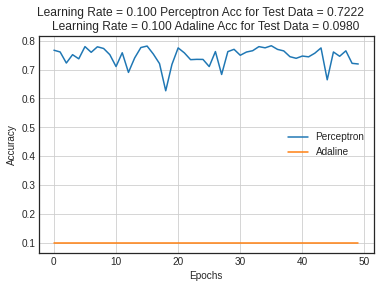

In [ ]:
#definimos la taza de aprendizaje
learning_rate = 0.1

#inicializamos el Adaline
Perceptron01 = MulticlassPerceptron(train_data, train_labels, umbral, weight_range_min, weight_range_max)

#entrenamos la red
Perceptron01.train(train_data, len(train_data), train_labels, num_of_epochs, learning_rate)

#inicializamos el Adaline
adaline01 = Adaline(train_data, train_labels, identity, weight_range_min, weight_range_max)

#entrenamos la red
adaline01.train(train_data, len(train_data), train_labels, num_of_epochs, learning_rate)

################################################################################
import matplotlib.pyplot as plt

p1 = plt.plot(Perceptron01.acc_evol)
p2 = plt.plot(adaline01.acc_evol)
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.title('Learning Rate = %.3f Adaline Acc for Test Data = %.4f' % (learning_rate,adaline01.accuracy(test_data, len(test_data), test_labels)))
plt.suptitle('Learning Rate = %.3f Perceptron Acc for Test Data = %.4f' % (learning_rate,Perceptron01.accuracy(test_data, len(test_data), test_labels)))
plt.legend((p1[0], p2[0]), ('Perceptron', 'Adaline'))
plt.grid(True)
plt.show()

En esta comparacion resulta ganador el Perceptron, con un amplio margen de diferencia, de hecho el programa presenta un error de ejecucion al entrenar al adaline.

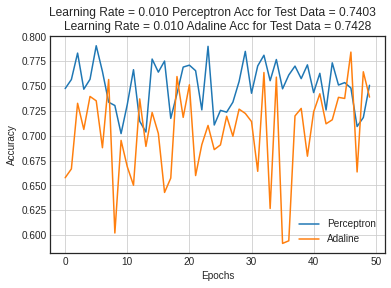

In [ ]:
#definimos la taza de aprendizaje
learning_rate = 0.01

#inicializamos el Perceptron
Perceptron001 = MulticlassPerceptron(train_data, train_labels, umbral, weight_range_min, weight_range_max)

#entrenamos la red
Perceptron001.train(train_data, len(train_data), train_labels, num_of_epochs, learning_rate)

#inicializamos el Adaline
adaline001 = Adaline(train_data, train_labels, identity, weight_range_min, weight_range_max)

#entrenamos la red
adaline001.train(train_data, len(train_data), train_labels, num_of_epochs, learning_rate)

################################################################################
import matplotlib.pyplot as plt

p1 = plt.plot(Perceptron001.acc_evol)
p2 = plt.plot(adaline001.acc_evol)
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.title('Learning Rate = %.3f Adaline Acc for Test Data = %.4f' % (learning_rate,adaline001.accuracy(test_data, len(test_data), test_labels)))
plt.suptitle('Learning Rate = %.3f Perceptron Acc for Test Data = %.4f' % (learning_rate,Perceptron001.accuracy(test_data, len(test_data), test_labels)))
plt.legend((p1[0], p2[0]), ('Perceptron', 'Adaline'))
plt.grid(True)
plt.show()

En esta comparacion ambos se encuentran bastante cercanos incluso dependiendo de la corrida puede ganar uno u otro. Como conclusion de este experimento evidenciamos lo vital que es la escogencia de la taza de aprendizaje para el adaline, y su potencial para obtener mejores resultados que el perceptron para ciertos conjuntos de datos.

3. Para los datos en datosT3.csv busque un interpolador utilizando un Adaline. Comente sobre las decisiones del algoritmo como por ejemplo numero de epocas, tasa de aprendizaje, etc.

Para tener una intuicion acerca del grado del polinomio deseado, graficamos los puntos que deseamos interpolar

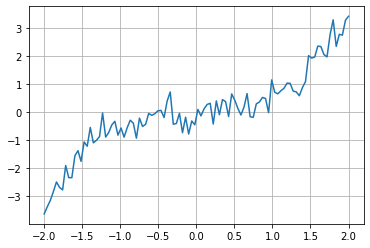

In [ ]:
def readDatosT3CSV(file):
    with open(file, newline='') as File:
        reader = csv.reader(File)
        data = []
        for r in reader:
            for i in range(len(r)):
                r[i] = float(r[i])
            data.append(r)
    return data

def genInputs(rawData):
  N = len(rawData)
  data = []
  for i in range(N):
    data.append(np.array([rawData[i][0]]))
  return data

def genLabels(rawData):
  N = len(rawData)
  data = []
  for i in range(N):
    label = np.zeros(1)
    label[0] = rawData[i][1]
    data.append(label)
  return data

def plotPoints(X, Y):
  plt.plot(X,Y)
  plt.grid(True)
  plt.show()

raw_train_data = readDatosT3CSV('/content/drive/My Drive/RNA/Tarea 3/datosT3.csv')
train_labels   = genLabels(raw_train_data)
train_inputs   = genInputs(raw_train_data)
plotPoints(train_inputs, train_labels)

Observamos una forma que nos recuerda a un polinomio de grado impar, lo que nos da una intuicion acerca del grado del polinomio, probemos con grado 3, dado que no pareciese que vale la pena intentar grado 1.

In [ ]:
#Respuesta 3

import csv
import matplotlib.pyplot as plt
import random
import numpy as np

class Adaline():

    def __init__(self, train_data, labels, function, weight_range_min, weight_range_max):
        dim_imputs       = train_data[0].shape[0] + 1
        dim_outputs      = labels[0].shape[0]
        self.dim_imputs  = dim_imputs
        self.dim_outputs = dim_outputs
        self.weights     = np.random.uniform(low=weight_range_min, high=weight_range_max, size=(dim_outputs, dim_imputs))
        self.function    = function
        self.cost_evol   = []

    def predict(self, input):
        wx = np.dot(self.weights, np.append(input, 1))
        return [self.function(x) for x in wx]

    def train(self, training_inputs, number_of_inputs, labels, numOfEpochs, learningRate):
        self.acc_evol = []
        data_index = list(range(number_of_inputs))
        for e in range(numOfEpochs):
            for index in data_index:
                prediction      =   self.predict(training_inputs[index])
                error = labels[index] - prediction
                self.weights    +=  learningRate * np.outer((error), np.append(training_inputs[index], 1))
            
            cost = np.sum(np.power(error, 2)) / 2.0
            self.cost_evol.append(cost)

#Funcion de activacion para el adaline
def identity(x):
    return x

#Definimos el min y max del rango de pesos
weight_range_min = -0.5
weight_range_max = 0.5

#Definimos el numero de epocas
epochs = [50,100,150]

#definimos la taza de aprendizaje
lRate = [0.01, 0.001, 0.0001]

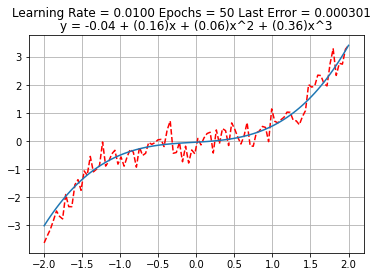

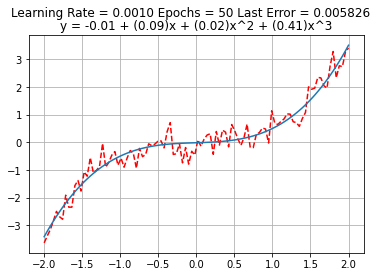

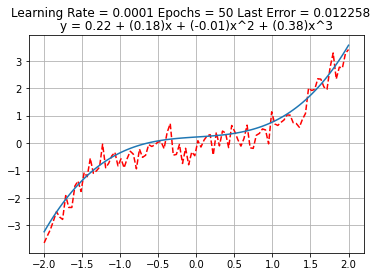

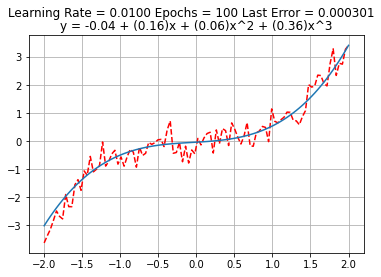

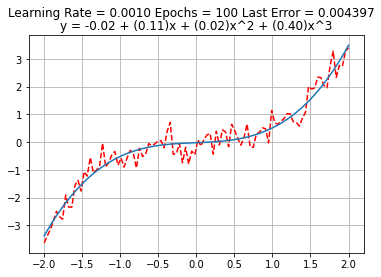

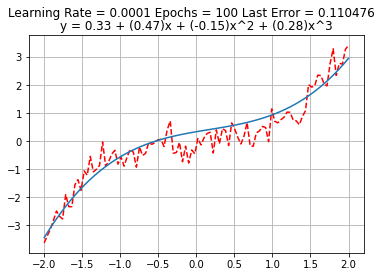

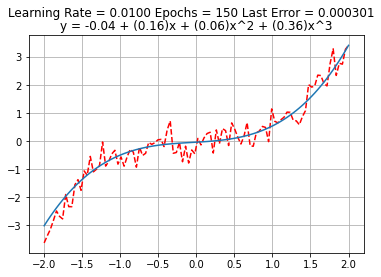

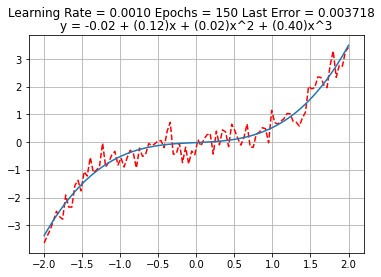

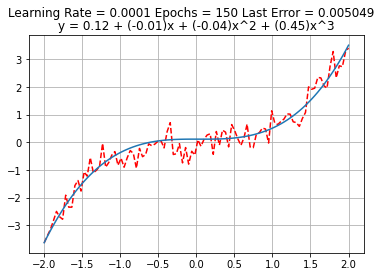

In [ ]:
### Almacenamos los inputs para un polinomio de grado3
def genInputs3(rawData):
  N = len(rawData)
  data = []
  for i in range(N):
    data.append(np.array([rawData[i][0], (rawData[i][0])**2, (rawData[i][0])**3]))
  return data

#guardamos los datos de entrenamiento
train_inputs   = genInputs3(raw_train_data)

#Probamos para todas las combinaciones del las tazas de aprendizaje
#y numero de epocas que definimos previamente

for num_of_epochs in epochs:
  for learning_rate in lRate:
    #inicializamos la red
    RNA = Adaline(train_inputs, train_labels, identity, weight_range_min, weight_range_max)

    #entrenamos la red
    RNA.train(train_inputs, len(train_inputs), train_labels, num_of_epochs, learning_rate)

    x = np.linspace(-2,2,100)

    predictions = []
    for i in x:
        predictions.append(RNA.predict(np.array([i, (i)**2, (i)**3])))

    originalX = []
    for i in range(len(train_inputs)):
        originalX.append(train_inputs[i][0])

    
    plt.plot(originalX,train_labels, 'r--', x, predictions)
    plt.title('y = %.2f + (%.2f)x + (%.2f)x^2 + (%.2f)x^3' % (RNA.weights[0][3], RNA.weights[0][0],RNA.weights[0][1],RNA.weights[0][2]))
    plt.suptitle('Learning Rate = %.4f Epochs = %d Last Error = %f' % (learning_rate, num_of_epochs, RNA.cost_evol[-1]))
    plt.grid(True)
    plt.show()

Vemos que para los interpoladores de grado 3 obtenidos, el error cuadratico medio obtenido en la ultima epoca estuvo entre [0.0003, 0.06], sin embargo este minimo fue reportado por el interpolador producido con  la taza de aprendizaje 0.01 con 50(a veces), 100 y 150 epocas de entrenamiento, por lo que no solo arrojo el menor error, si no que este fue su valor de convergencia, cosa que no sucedio con las otras tazas de aprendizaje.
Podemos decir entonces que el mejor interpolador encontrado fue $y= -(0.04) +(0.16)x + (0.06)x^2 + (0.36)x^3 $


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:32: RuntimeWarning: overflow encountered in power


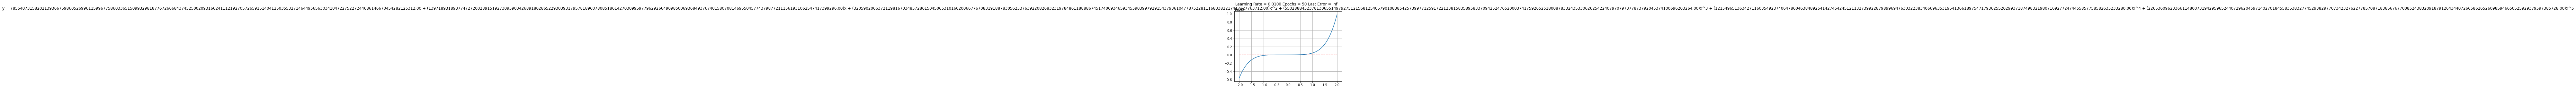

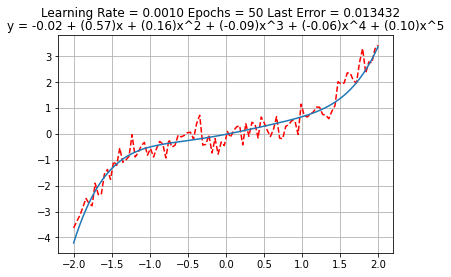

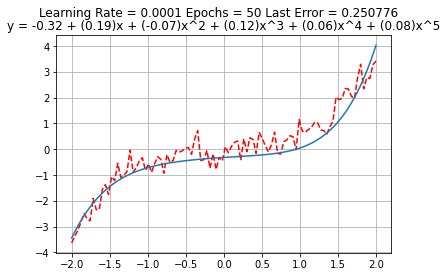

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:32: RuntimeWarning: overflow encountered in power
/usr/local/lib/python3.6/dist-packages/numpy/core/numeric.py:906: RuntimeWarning: overflow encountered in multiply
  return multiply(a.ravel()[:, newaxis], b.ravel()[newaxis, :], out)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:30: RuntimeWarning: invalid value encountered in add


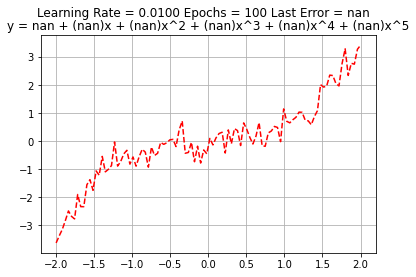

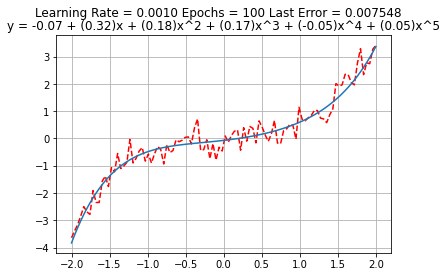

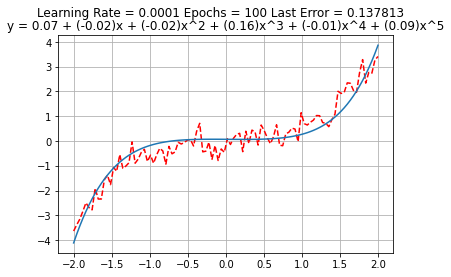

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:32: RuntimeWarning: overflow encountered in power
/usr/local/lib/python3.6/dist-packages/numpy/core/numeric.py:906: RuntimeWarning: overflow encountered in multiply
  return multiply(a.ravel()[:, newaxis], b.ravel()[newaxis, :], out)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:30: RuntimeWarning: invalid value encountered in add


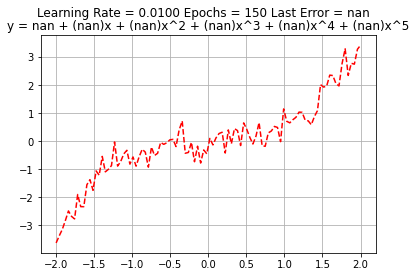

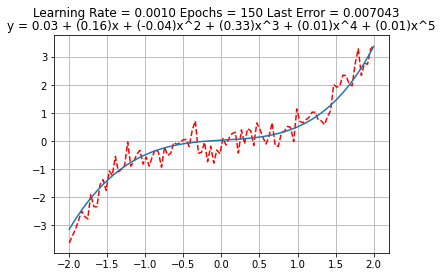

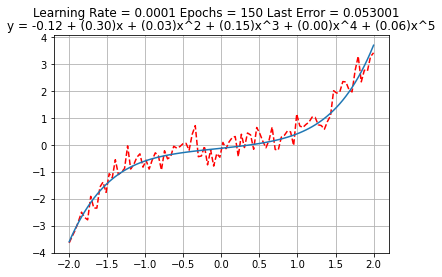

In [ ]:
### Almacenamos los inputs para un polinomio de grado5
def genInputs5(rawData):
  N = len(rawData)
  data = []
  for i in range(N):
    data.append(np.array([rawData[i][0], (rawData[i][0])**2, (rawData[i][0])**3, (rawData[i][0])**4, (rawData[i][0])**5]))
  return data

#guardamos los datos de entrenamiento
train_inputs   = genInputs5(raw_train_data)

#Probamos para todas las combinaciones del las tazas de aprendizaje
#y numero de epocas que definimos previamente

for num_of_epochs in epochs:
  for learning_rate in lRate:
    #inicializamos la red
    RNA = Adaline(train_inputs, train_labels, identity, weight_range_min, weight_range_max)

    #entrenamos la red
    RNA.train(train_inputs, len(train_inputs), train_labels, num_of_epochs, learning_rate)

    x = np.linspace(-2,2,100)

    predictions = []
    for i in x:
        predictions.append(RNA.predict(np.array([i, (i)**2, (i)**3, (i)**4, (i)**5])))

    originalX = []
    for i in range(len(train_inputs)):
        originalX.append(train_inputs[i][0])

    plt.plot(originalX,train_labels, 'r--', x, predictions)
    plt.title('y = %.2f + (%.2f)x + (%.2f)x^2 + (%.2f)x^3 + (%.2f)x^4 + (%.2f)x^5' % (RNA.weights[0][5], RNA.weights[0][0],RNA.weights[0][1],RNA.weights[0][2],RNA.weights[0][3],RNA.weights[0][4]))
    plt.suptitle('Learning Rate = %.4f Epochs = %d Last Error = %f' % (learning_rate, num_of_epochs, RNA.cost_evol[-1]))
    plt.grid(True)
    plt.show()

Vemos que para los interpoladores de grado 5 obtenidos, el error cuadratico medio obtenido en la ultima epoca estuvo entre [0.0004, 0.06], en la mayoria de ejecuciones. Dado los mensajes del programa podemos notar que las cuentas se complican notablemente y no se aprecia una mejora en la interpolacion resultante, pero si se nota una mayor variabilidad entre cada ejecucion. Por lo que no se considera seguir aumentando el grado del polinomio.

4. Considere la función de costo

$$\epsilon\left(w\right)=\frac{\sigma^{2}}{2}-r^{t}w+\frac{1}{2}w^{t}Rw$$
Asumamos $w =
\begin{bmatrix}
a\\
b
\end{bmatrix}$ optimo para el cual $\epsilon\left(w\right)$ es minimo. Desarrollamos la funcion de costo:
$$
\\
$$
$$\frac{\sigma^{2}}{2}-
\begin{bmatrix}
0.8182 & 0.354 
\end{bmatrix}
\begin{bmatrix}
a \\
b
\end{bmatrix}
+ \frac{1}{2}
\begin{bmatrix}
a & b
\end{bmatrix}
\begin{bmatrix}
1 & 0.8182\\
0.8182 & 1
\end{bmatrix}
\begin{bmatrix}
a \\
b
\end{bmatrix}
$$
$$
\\
$$
$$
\frac{\sigma^{2}}{2}-0.8182\cdot a - 0.354\cdot b + \frac{a^{2}}{2}+0.8182\cdot a\cdot b + \frac{b^{2}}{2}
$$
$$
\\
$$
Dado que w es optimo podemos encontrar sus valores numericos con el criterio de la 2da derivada. Calculamos la primera derivada:
$$\frac{\partial \epsilon\left(w\right)}{\partial a}=-0.8182+a+0.8182\cdot b$$
$$
\\
$$
$$\frac{\partial \epsilon\left(w\right)}{\partial b}=-0.354+b+0.8182\cdot a$$
Igualando a 0 planteamos el siguiente sistema de ecuaciones:
$$
\\
$$
$$
\left.
\begin{array}{rcl}
     0.8182 - 0.8182\cdot b & = & a
  \\ 0.354 - 0.8182 \cdot a & = & b
\end{array}
\right\}
$$
$$
\\
$$
Al resolverlos obtenemos los valores $a = 1.599$ y $b = -0.954$ como punto critico y calculamos la 2da derivada, para ver si se trata de un maximo, minimo o punto de inflexion
$$\frac{\partial^{2} \epsilon}{\partial a^{2}} = 1$$
$$
\\
$$
$$\frac{\partial^{2} \epsilon}{\partial ab} = 0.8182$$
$$
\\
$$
$$\frac{\partial^{2} \epsilon}{\partial ba} = 0.8182$$
$$
\\
$$
$$\frac{\partial^{2} \epsilon}{\partial b^{2}} = 1$$
$$
\\
$$
Contruimos las matriz Hessiana
$$
\\
$$
$$
\begin{bmatrix}
1 & 0.8182\\
0.8182 & 1
\end{bmatrix}
$$
$$
\\
$$
Dado que todos los menores relativos son mayores a 0 se concluye que el punto $\left(1.599,-0.954\right)$ es un minimo relativo, sin embargo dado que esto es cierto para cualquier punto y siendo este el unico punto critico (donde la primera derivada vale 0), es el minimo global, y por lo tanto punto optimo donde $\epsilon\left(w\right)$ es minimo


Para los valores optimos a = 1.599029 b = -0.954326
El costo minimo fue: -0.416535
Optimo encontrado en 70 iteraciones



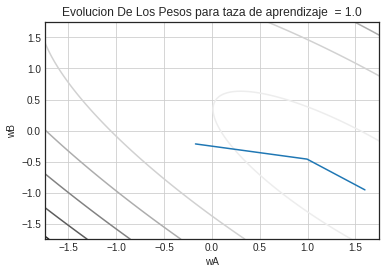

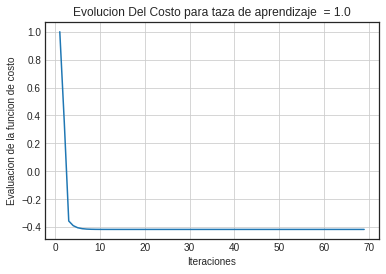


Para los valores optimos a = 1.599029 b = -0.954326
El costo minimo fue: -0.416535
Optimo encontrado en 400 iteraciones



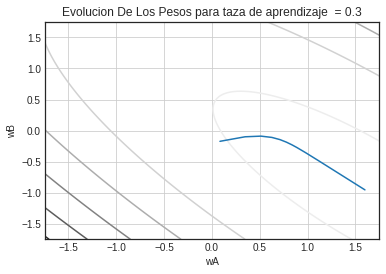

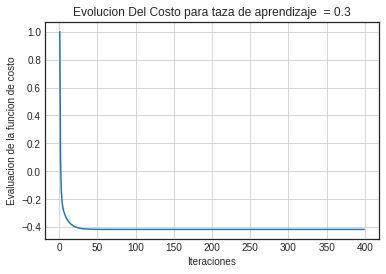

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')

def costo(sigma, wA, wB):
    return ((sigma**2)/2) - 0.8182*wA - 0.354*wB + (wA**2)/2 + 0.8180*wA*wB + (wB**2)/2

def parcialA(w):
    return -0.8182 + w[0][0] + 0.8182*w[1][0]

def parcialB(w):
    return -0.354 + w[1][0] + 0.8182*w[0][0]

def descensoDeGradiente(w):
  numOfIter = 1
  wAEvol = []
  wBEvol = []
  costEvol = []
  iterEvol = []
  a = 1
  b = 0

  while a != b:
      iterEvol.append(numOfIter)
      costEvol.append(a)
      wAEvol.append(w[0][0])
      wBEvol.append(w[1][0])

      a = costo(sigma, w[0][0], w[1][0])
      w[0][0] = w[0][0] - lR * parcialA(w)
      w[1][0] = w[1][0] - lR * parcialB(w)
      b = costo(sigma, w[0][0], w[1][0])
      numOfIter += 1

  print()
  print("Para los valores optimos a = %f b = %f" % (w[0][0],w[1][0]))
  print("El costo minimo fue: %f" % (costo(sigma, w[0][0], w[1][0])))
  print("Optimo encontrado en %d iteraciones" % (numOfIter))
  print()

  #Ploteamos la evolucion de los pesos
  plt.plot(wAEvol,wBEvol)
  plt.ylabel('wB')
  plt.xlabel('wA')
  plt.title('Evolucion De Los Pesos para taza de aprendizaje  = %.1f' % (lR))
  plt.grid(True)

  x = np.linspace(-1.75, 1.75, 100)
  y = np.linspace(-1.75, 1.75, 100)
  X, Y = np.meshgrid(x, y)
  Z = costo(sigma,X, Y)
  plt.contour(X, Y, Z)
  plt.show()

  #Ploteamos el costo a traves de las iteraciones
  plt.plot(iterEvol,costEvol)
  plt.ylabel('Evaluacion de la funcion de costo')
  plt.xlabel('Iteraciones')
  plt.title('Evolucion Del Costo para taza de aprendizaje  = %.1f' % (lR))
  plt.grid(True)
  plt.show()

sigma = np.random.uniform(low=-0.5, high=0.5, size=(1, 1))[0]

#Caso taza de aprendizaje = 1.0
w = np.random.uniform(low=-0.5, high=0.5, size=(2, 1))
lR = 1.0
descensoDeGradiente(w)

#Caso taza de aprendizaje = 0.3
w = np.random.uniform(low=-0.5, high=0.5, size=(2, 1))
lR = 0.3
descensoDeGradiente(w)